# HOMEWORK 2
For this homework you will have to complete and implement the colour balancing for:
* Gray world algorithm
* Scale-by-max algorithm

You are free to use your own images. Experiment with more images and think about the effect each of the algorithms has on the resulting (balanced) image.

### Colour Balancing
In this notebook we will show different type of colour balancing making use of von Kries' hypothesis.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

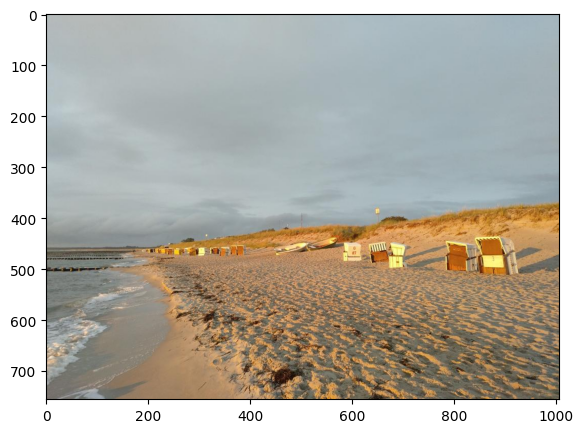

In [4]:
img = cv2.imread('./data/sea.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### White patch
In white patch algorithm we choose a group of pixels we know they should be white. We then scale the resulting image colour channels by this white patch.

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x14ff701c0>)

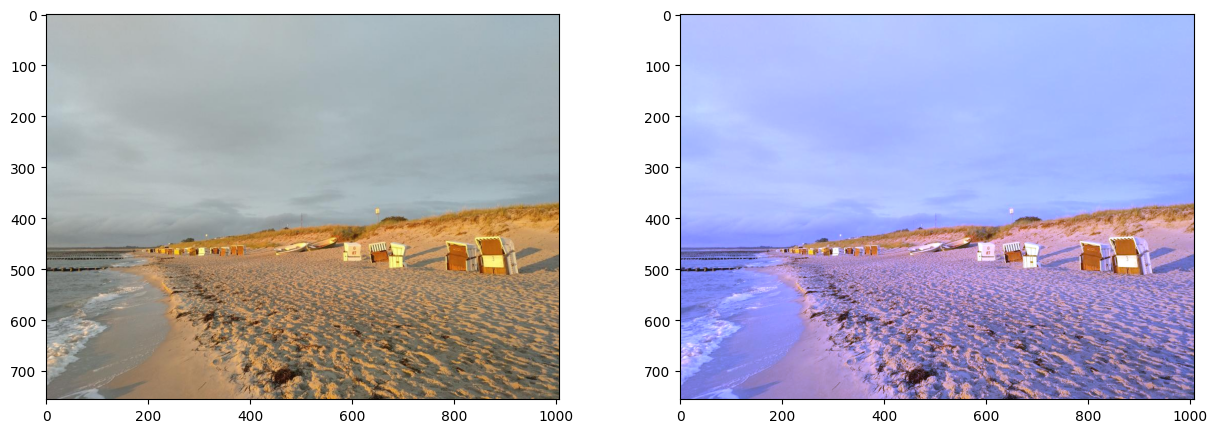

In [5]:
# Define white patch and the coefficients
row, col = 485, 864 
white = img[row, col, :]

coeffs = 255.0/white

# Apply white balancing and generate balanced image
balanced = np.zeros_like(img, dtype=np.float32)

for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

### Gray world
This algorithm assumes that a scene, on average, is gray.

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x152b77eb0>)

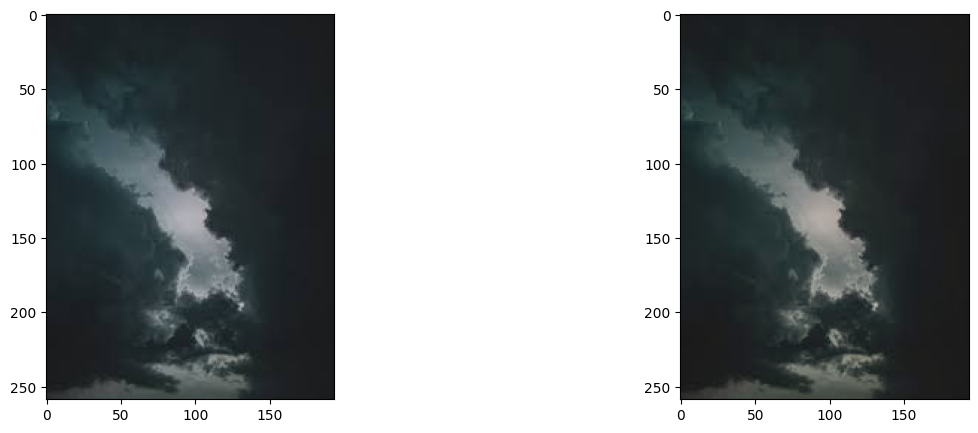

In [43]:
# Load your image
img = cv2.imread('./data/test.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

red, green, blue = cv2.split(img)

# Compute the mean values for all three colour channels (red, green, blue)
mean_r = np.average(red)
mean_g = np.average(green)
mean_b = np.average(blue)

k = np.average([mean_r, mean_g, mean_b])

# Compute the coefficients kr, kg, kb
# Note: there are 3 coefficients to compute but we only have 2 equations.
# Therefore, you have to make an assumption, fix the value of one of the
# coefficients and compute the remining two
# Hint: You can fix the coefficient of the brightest colour channel to 1.
kr = k / mean_r
kg = k / mean_g
kb = k / mean_b

kr = kr if kr < 1 else 1
kg = kg if kg < 1 else 1
kb = kb if kb < 1 else 1

# Apply color balancing and generate the balanced image
new_r = np.multiply(kr, red)
new_g = np.multiply(kg, green)
new_b = np.multiply(kb, blue)

balanced = np.zeros_like(img, dtype=np.float32)

balanced[:, :, 0] = np.multiply(kr, red)
balanced[:, :, 1] = np.multiply(kg, green)
balanced[:, :, 2] = np.multiply(kb, blue)

balanced = np.where(balanced > 255.0, 255, balanced).astype(np.uint8)

# Show the original and the balanced image side by side
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

### Scale-by-max
This is a straightforward algorithm that scales each colour channel by its maximum value. Note that it is sensitive to noise and saturations.

max_r =  191
max_g =  202
max_b =  206


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x152872710>)

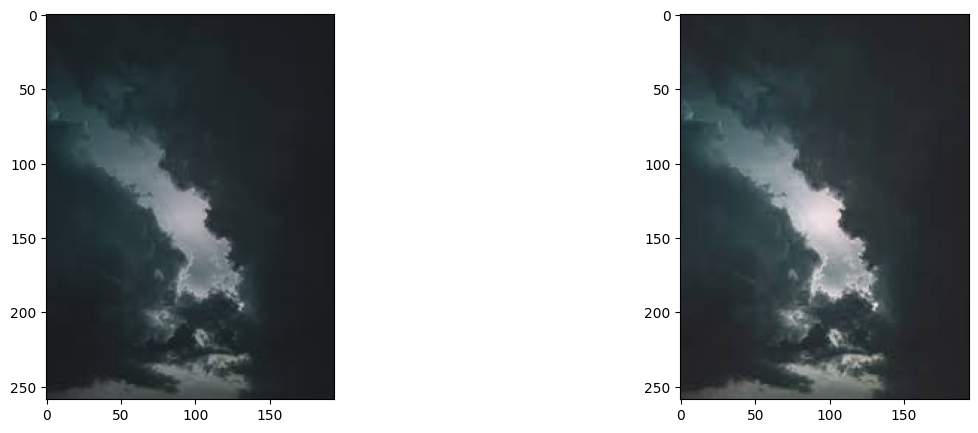

In [45]:
# Load your image
img = cv2.imread('./data/test.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

red, green, blue = cv2.split(img)

# Compute the maximum values for all three colour channels (red, green, blue)
max_r = np.max(red)
max_g = np.max(green)
max_b = np.max(blue)

print('max_r = ', max_r)
print('max_g = ', max_g)
print('max_b = ', max_b)

# Apply scale-by-max balancing and generate the balanced image

balanced = np.zeros_like(img, dtype=np.float32)

balanced[:, :, 0] = np.multiply(255 / max_r, red)
balanced[:, :, 1] = np.multiply(255 / max_g, green)
balanced[:, :, 2] = np.multiply(255 / max_b, blue)

balanced = np.where(balanced > 255.0, 255, balanced).astype(np.uint8)

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)